# Imersão de Dados com Python


## Aula 1 - Análise de Dados com Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print(f"O DataFrame possui {linhas} linhas e {colunas} colunas.")

O DataFrame possui 133349 linhas e 11 colunas.


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
})

print("Novas colunas do DataFrame:")
print(df.columns)

Novas colunas do DataFrame:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [10]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [14]:
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)

print("Novos valores da coluna 'senioridade' (traduzidos):")
df['senioridade'].value_counts()

Novos valores da coluna 'senioridade' (traduzidos):


,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [15]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(contrato)

print("Novos valores da coluna 'contrato' (traduzidos):")
df['contrato'].value_counts()

Novos valores da coluna 'contrato' (traduzidos):


,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [16]:
tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

print("Novos valores da coluna 'tamanho_empresa' (traduzidos):")
df['tamanho_empresa'].value_counts()

Novos valores da coluna 'tamanho_empresa' (traduzidos):


,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [17]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)

print("Novos valores da coluna 'remoto' (traduzidos):")
df['remoto'].value_counts()

Novos valores da coluna 'remoto' (traduzidos):


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


## Imersão Dados com Python II
## Aula 2 - Limpeza de Dados com Pandas

In [20]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [21]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


### Criando um dataframe fictício para estudos

In [23]:
import numpy as np

# criando um dataframe para exemplificar a aplicação da média e mediana no preenchimento de valores nulos
df_salarios = pd.DataFrame({
    'nome': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas'],
    'idade': [25, 30, 22, 28, 35],
    'cargo': ['Analista de Dados', 'Engenheiro de Software', 'Cientista de Dados', 'Analista de Marketing','Gerente de Projetos'],
    'salario': [6000, np.nan, 7500, np.nan, 19000],
})

# calculo da média salarial e substituição dos valores nulos pela média de salário, arredondando os valores
df_salarios['salario_media'] = df_salarios ['salario'].fillna(df_salarios['salario'].mean().round(2))

'''
calculo da mediana salarial e substituição dos valores nulos pela mediana de salário, arredondando os valores
'''
df_salarios['salario_mediana'] = df_salarios ['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,idade,cargo,salario,salario_media,salario_mediana
0,João,25,Analista de Dados,6000.0,6000.00,6000.0
1,Maria,30,Engenheiro de Software,NaN,10833.33,7500.0
2,Pedro,22,Cientista de Dados,7500.0,7500.00,7500.0
3,Ana,28,Analista de Marketing,NaN,10833.33,7500.0
4,Lucas,35,Gerente de Projetos,19000.0,19000.00,19000.0


In [24]:
df_temperaturas = pd.DataFrame({
    'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Curitiba'],
    'temperatura': [25, np.nan, np.nan, 28, 35],
    'umidade': [80, 90, 70, 60, 50],
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()
df_temperaturas

,cidade,temperatura,umidade,dia,preenchido_ffill
0,São Paulo,25.0,80,Segunda,25.0
1,Rio de Janeiro,NaN,90,Terça,25.0
2,Belo Horizonte,NaN,70,Quarta,25.0
3,Porto Alegre,28.0,60,Quinta,28.0
4,Curitiba,35.0,50,Sexta,35.0


In [25]:
df_temperaturas = pd.DataFrame({
    'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Curitiba'],
    'temperatura': [25, np.nan, np.nan, 28, 35],
    'umidade': [80, 90, 70, 60, 50],
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()
df_temperaturas

,cidade,temperatura,umidade,dia,preenchido_bfill
0,São Paulo,25.0,80,Segunda,25.0
1,Rio de Janeiro,NaN,90,Terça,28.0
2,Belo Horizonte,NaN,70,Quarta,28.0
3,Porto Alegre,28.0,60,Quinta,28.0
4,Curitiba,35.0,50,Sexta,35.0


In [26]:
df_cidades = pd.DataFrame({
    'cidade': ['São Paulo', np.nan, 'Belo Horizonte', 'Porto Alegre', np.nan],
    'nome': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas'],
    'idade': [25, 30, 22, 28, 43],
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,cidade,nome,idade,cidade_preenchida
0,São Paulo,João,25,São Paulo
1,NaN,Maria,30,Não informado
2,Belo Horizonte,Pedro,22,Belo Horizonte
3,Porto Alegre,Ana,28,Porto Alegre
4,NaN,Lucas,43,Não informado


In [27]:
df_tratado = df.dropna()

In [28]:
df_tratado.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [29]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [30]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [31]:
df_tratado = df_tratado.assign(ano = df_tratado['ano'].astype('int64'))

## Imersão Dados com Python II
Aula 3 - Visualização de Dados

In [32]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


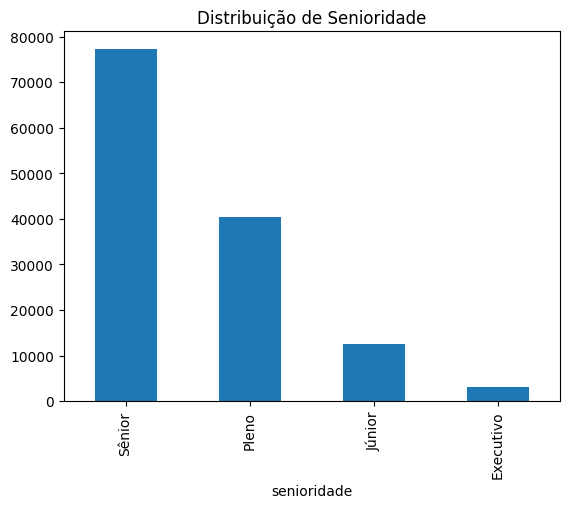

In [33]:
import matplotlib.pyplot as plt
df_tratado['senioridade'].value_counts().plot(kind='bar', title = "Distribuição de Senioridade")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

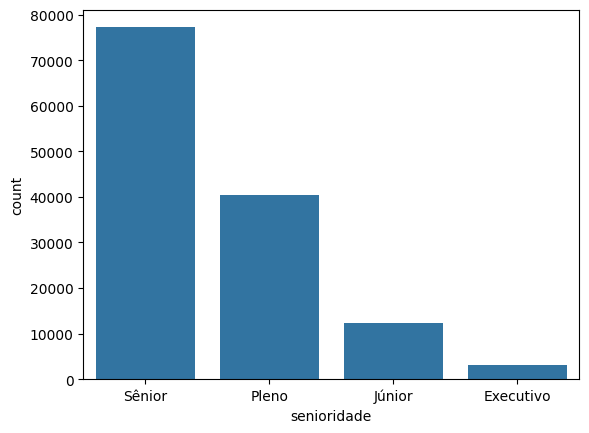

In [34]:
import seaborn as sns
sns.countplot(data=df_tratado, x='senioridade')
plt

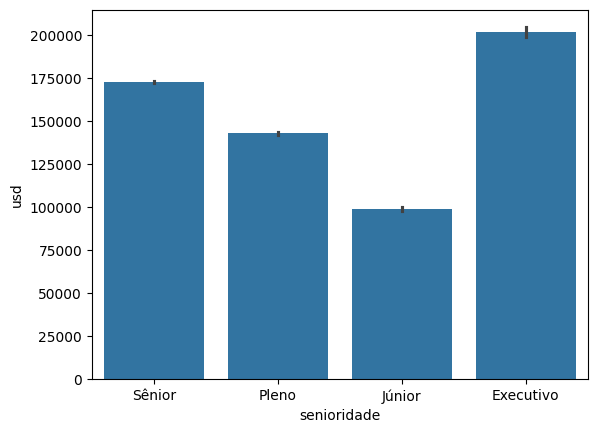

In [35]:
sns.barplot(data=df_tratado, x='senioridade', y='usd')
plt.show()

In [36]:
import matplotlib.pyplot as plt

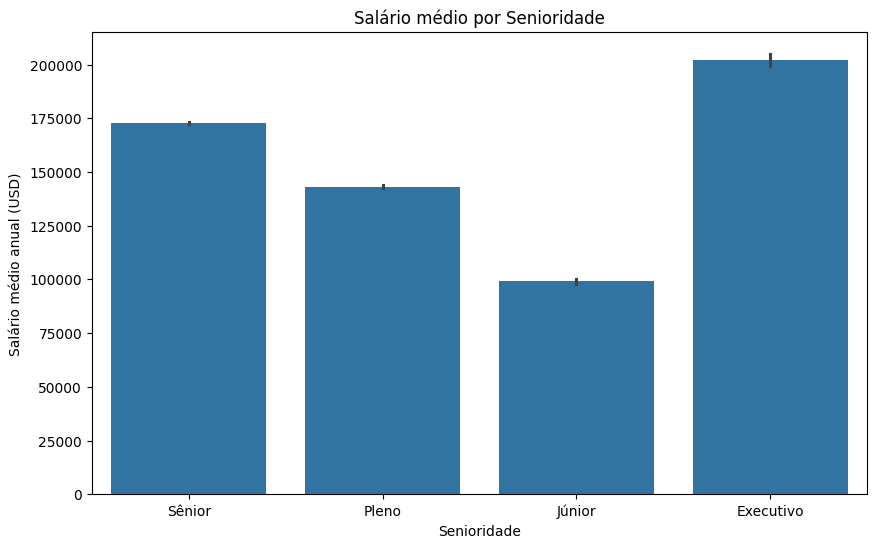

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tratado, x='senioridade', y='usd')
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [38]:
df_tratado.groupby('senioridade')['usd'].mean().sort_values(ascending=False).round(2)

,usd
senioridade,
Executivo,202027.67
Sênior,172850.84
Pleno,143044.85
Júnior,99034.96


In [39]:
ordem = df_tratado.groupby('senioridade')['usd'].mean().sort_values(ascending=False).round(2).index
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

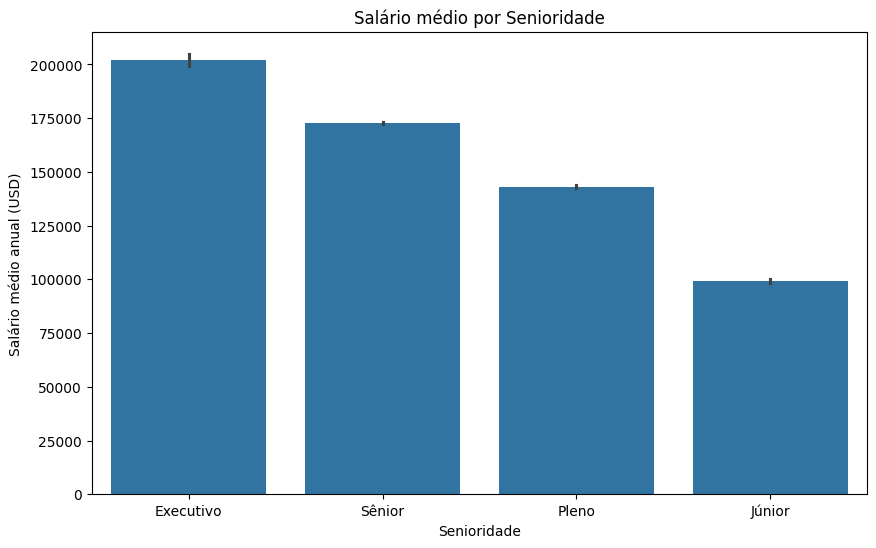

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tratado, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

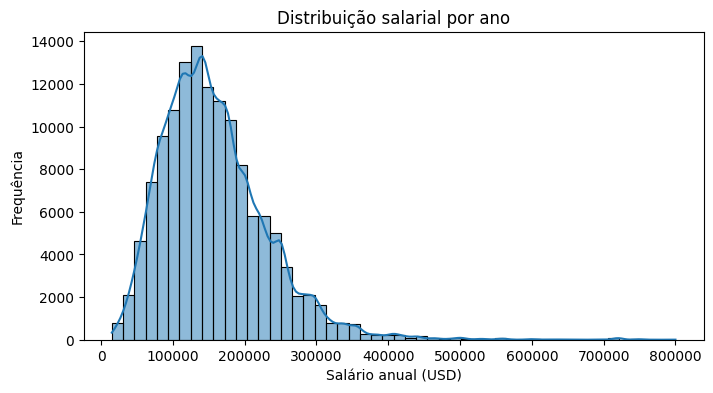

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tratado['usd'],bins=50, kde=True)
plt.title('Distribuição salarial por ano')
plt.xlabel('Salário anual (USD)')
plt.ylabel('Frequência')
plt.show()

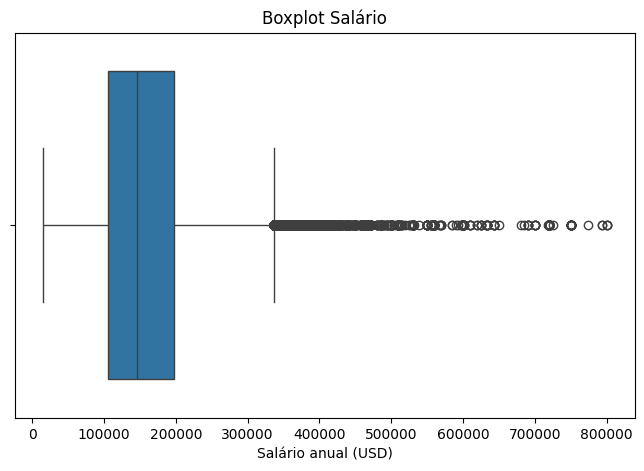

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_tratado['usd'])
plt.title('Boxplot Salário')
plt.xlabel('Salário anual (USD)')
plt.show()

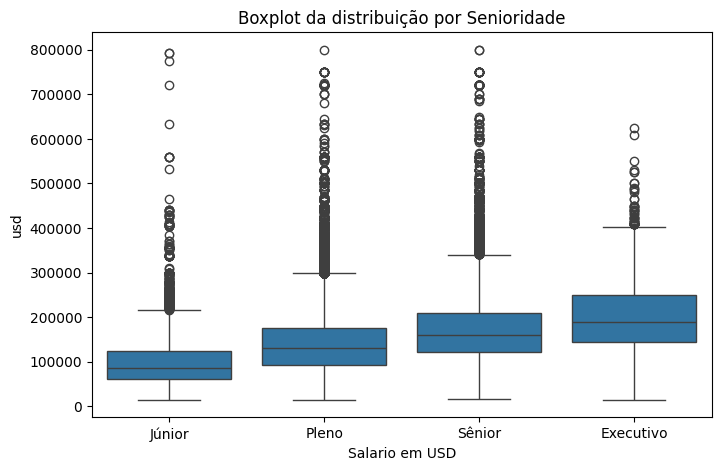

In [43]:
#ordem_senioridade = ['Executivo', 'Sênior', 'Pleno', 'Júnior']
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd',data=df_tratado, order=ordem_senioridade)
plt.title('Boxplot da distribuição por Senioridade')
plt.xlabel('Salario em USD')
plt.show()

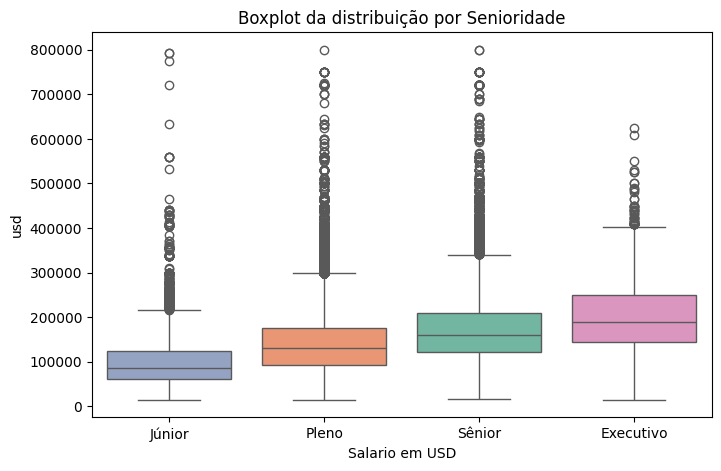

In [44]:
#ordem_senioridade = ['Executivo', 'Sênior', 'Pleno', 'Júnior']
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd',data=df_tratado, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da distribuição por Senioridade')
plt.xlabel('Salario em USD')
plt.show()

In [45]:
import plotly.express as px

In [46]:
df_media_senioridade = df_tratado.groupby('senioridade')['usd'].mean().sort_values(ascending=False).round(2).reset_index()
fig = px.bar(
    df_media_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade (Plotly)',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
    color='senioridade',
    category_orders={'senioridade': df_media_senioridade['senioridade'].tolist()}
)
fig.show()

In [47]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
#remoto_contagem

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção dos tipos de trabalho')
fig.show()

In [48]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
#remoto_contagem

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.show()

In [49]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
#remoto_contagem

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [50]:
df_data_scientist = df_tratado[df_tratado['cargo'] == 'Data Scientist']

df_media_salario_pais = df_data_scientist.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    df_media_salario_pais,
    x='empresa',
    y='usd',
    title='Salário Médio de Data Scientists por País (USD)',
    labels={'empresa': 'Localização da Empresa (País)', 'usd': 'Salário Médio Anual (USD)'},
    color='empresa',
    category_orders={'empresa': df_media_salario_pais['empresa'].tolist()}
)
fig.show()

In [51]:

df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [52]:

pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.2 MB/s eta 0:00:00


In [54]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_tratado['residencia_iso3'] = df_tratado['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_tratado[df_tratado['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [55]:

df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [56]:
df_tratado.to_csv('dados-imersao-final.csv', index=False)